# NLP with Disaster Tweets

## Modeling

### Sync with Google Drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

repo_dir = "/content/drive/MyDrive/Kaggle/Competitions/NLP-with-Disaster-Tweets"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Data & Libraries

In [12]:
import numpy as np                                        # Linear Algebra
from matplotlib import pyplot as plt                      # Matplotlib for plots
import pandas as pd                                       # Pandas for DataFrame

# Keras packages
from keras.preprocessing.text import Tokenizer            # Simplifies different tokenizing methods
from keras.utils.vis_utils import plot_model              # For plotting model
from keras.models import Sequential                       # Sequential model
from keras.layers import Dense                            # Dense layer

In [13]:
train_text_df = pd.read_pickle(f'{repo_dir}/data/processed/train_text_df.csv')
test_text_df = pd.read_pickle(f'{repo_dir}/data/processed/test_text_df.csv')

### Tokenizing & Defining Functions

In [14]:
tokenizer = Tokenizer(oov_token = '?')
tokenizer.fit_on_texts(train_text_df['clean_text'])

# Modes: 'binary', 'count', 'freq', 'tfidf'
X_text_train_encodes = tokenizer.texts_to_matrix(train_text_df['clean_text'], mode = 'binary')
X_text_test_encodes = tokenizer.texts_to_matrix(test_text_df['clean_text'], mode = 'binary')

print('Matrix shape:', X_text_train_encodes.shape)

Matrix shape: (7613, 11799)


In [15]:
print('Sentences count:', tokenizer.document_count)
print('Top 5 words that are most frequent among vocabulary:', sorted(tokenizer.word_counts.items(), key = lambda x: x[1], reverse = True)[:5])
print('Top 5 words that are most frequent among sentences:', sorted(tokenizer.word_docs.items(), key = lambda x: x[1], reverse = True)[:5])

Sentences count: 7613
Top 5 words that are most frequent among vocabulary: [('url', 4713), ('like', 393), ('fire', 362), ('amp', 300), ('new', 240)]
Top 5 words that are most frequent among sentences: [('url', 3966), ('like', 376), ('fire', 332), ('amp', 270), ('new', 232)]


In [16]:
def build_model(x, loss, optimizer, metrics):
    model = Sequential()
    model.add(Dense(units = 64, input_shape = (x.shape[1],), activation = 'relu'))
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(loss = loss, optimizer = optimizer, metrics = metrics)

    return model

In [17]:
def train_model(model, x, y, epochs, batch_size, validation_split):
    history = model.fit(
    x = x,
    y = y,
    epochs = epochs,
    batch_size = batch_size,
    validation_split = validation_split
    )

    return history.history

In [18]:
def plot_model_training(epochs, history, metrics):    

    def plot_subplot(axs, metric, val_metric):
        ''' Plot a single subplot '''

        axs.set_title('Analysis of ' + metric)
        axs.plot(epochs, history[metric], label = metric)
        axs.plot(epochs, history[val_metric], label = val_metric)
        axs.legend()

    fig, axs = plt.subplots(1, len(metrics), figsize = (18, 5))

    for i, metric in enumerate(metrics):
        plot_subplot(axs[i], metric, 'val_' + metric)

### Building, Training and Plotting the Model

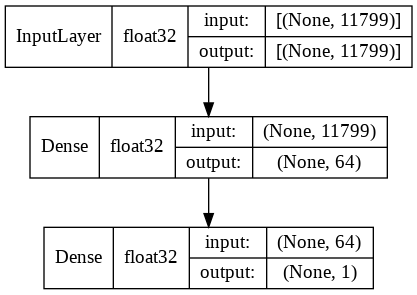

In [22]:
# Build model
model = build_model(
  x = X_text_train_encodes,
  loss = 'binary_crossentropy',
  optimizer = 'adam',
  metrics = ['accuracy']
)

# Plot model
plot_model(
  model = model,
  show_dtype = True,
  show_shapes = True,
  show_layer_names = False
)

96/96 [==============================] - 2s 16ms/step - loss: 0.5892 - accuracy: 0.7340 - val_loss: 0.5136 - val_accuracy: 0.8037


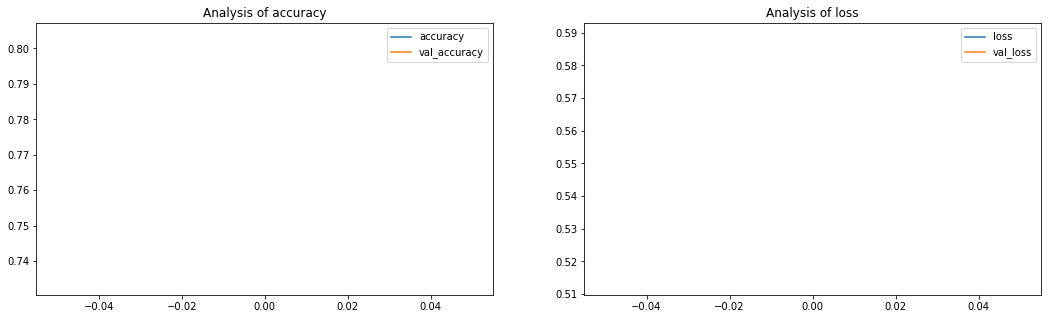

In [23]:
# Train model
history = train_model(
  model = model,
  x = X_text_train_encodes,
  y = train_text_df['target'],
  epochs = 1,
  batch_size = 64,
  validation_split = 0.2
)

# Plot training process
epochs = [i for i in range(len(history['loss']))]
plot_model_training(
  epochs = epochs,
  history = history,
  metrics = ['accuracy', 'loss']
)

### Making a Prediction

In [24]:
pred = model.predict(X_text_test_encodes, verbose = 2)
pred = np.round(pred).astype(int).reshape(pred.shape[0])

# Create a submission
submission = pd.DataFrame({'id': test_text_df['id'], 'target': pred})
submission.to_csv(f'{repo_dir}/data/submission.csv', index = False)

102/102 - 0s
